# Hate Speech Detection

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load Data

In [3]:
dataset = pd.read_csv("/content/TwitterHate.csv")
dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
dataset.isnull().sum()

,0
id,0
label,0
tweet,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
dataset.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
dataset['label'] = dataset['label'].map({0: "Hate Speech",
                                         1: "Offensive Language",
                                         2: "No hate or offensive language"})
dataset

,id,label,tweet
0,1,Hate Speech,@user when a father is dysfunctional and is s...
1,2,Hate Speech,@user @user thanks for #lyft credit i can't us...
2,3,Hate Speech,bihday your majesty
3,4,Hate Speech,#model i love u take with u all the time in ...
4,5,Hate Speech,factsguide: society now #motivation
...,...,...,...
31957,31958,Hate Speech,ate @user isz that youuu?ðððððð...
31958,31959,Hate Speech,to see nina turner on the airwaves trying to...
31959,31960,Hate Speech,listening to sad songs on a monday morning otw...
31960,31961,Offensive Language,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
data = dataset[["tweet", "label"]]
data

,tweet,label
0,@user when a father is dysfunctional and is s...,Hate Speech
1,@user @user thanks for #lyft credit i can't us...,Hate Speech
2,bihday your majesty,Hate Speech
3,#model i love u take with u all the time in ...,Hate Speech
4,factsguide: society now #motivation,Hate Speech
...,...,...
31957,ate @user isz that youuu?ðððððð...,Hate Speech
31958,to see nina turner on the airwaves trying to...,Hate Speech
31959,listening to sad songs on a monday morning otw...,Hate Speech
31960,"@user #sikh #temple vandalised in in #calgary,...",Offensive Language


In [9]:
# Importing stop wards and Stemming the words
stopwords = set(stopwords.words("english"))

In [10]:
# Importing stemming
stemmer = nltk.SnowballStemmer("english")

# Data Cleaning

In [11]:
def clean_data(text):
  text = str(text).lower()
  # Corrected line: Replacing URLs with an empty string
  text = re.sub('https?://\S+|www\.S+', '', text) # Replaced ', text' with ''
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('<.*?>+', '', text)
  # Added string.punctuation for using in re.escape
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  # Stop word removal
  text = [word for word in text.split(' ') if word not in stopwords]
  text = " ".join(text)
  # Stemming the text
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

In [12]:
data["tweet"] = data["tweet"].apply(clean_data)
data

<ipython-input-12-0077a87fb143>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


,tweet,label
0,user father dysfunct selfish drag kid dysfunc...,Hate Speech
1,user user thank lyft credit cant use caus dont...,Hate Speech
2,bihday majesti,Hate Speech
3,model love u take u time urð± ððð...,Hate Speech
4,factsguid societi motiv,Hate Speech
...,...,...
31957,ate user isz youuuððððððð...,Hate Speech
31958,see nina turner airwav tri wrap mantl genuin...,Hate Speech
31959,listen sad song monday morn otw work sad,Hate Speech
31960,user sikh templ vandalis calgari wso condemn ...,Offensive Language


In [13]:
X = np.array(data["tweet"])
y = np.array(data["label"])

In [14]:
X

array([' user father dysfunct selfish drag kid dysfunct   run',
       'user user thank lyft credit cant use caus dont offer wheelchair van pdx    disapoint getthank',
       '  bihday majesti', ...,
       'listen sad song monday morn otw work sad  ',
       'user sikh templ vandalis calgari wso condemn  act  ',
       'thank user follow  '], dtype=object)

In [15]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [16]:
X

<31962x34998 sparse matrix of type '<class 'numpy.int64'>'
	with 246419 stored elements in Compressed Sparse Row format>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
X_train

<21414x34998 sparse matrix of type '<class 'numpy.int64'>'
	with 164465 stored elements in Compressed Sparse Row format>

# Building ML Model

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(X_test)

# Model Evaluation

In [21]:
# ConfusionMatrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
cm

array([[9572,  234],
       [ 367,  375]])

<Axes: >

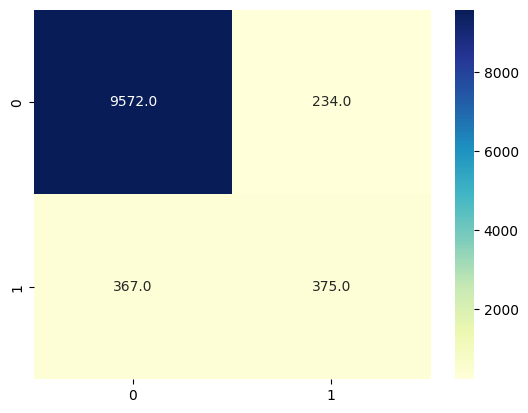

In [22]:
sns.heatmap(cm, annot = True, fmt = ".1f", cmap = "YlGnBu")

In [23]:
accuracy_score(y_test, y_pred)

0.943022373909746

# Prediction

In [24]:
sample = "Let's unite and kill all the people who are protesting against the government"
sample = clean_data(sample)
sample

'let unit kill peopl protest govern'

In [25]:
data1 = cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [26]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)